In [1]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d

In [2]:
df_train=pd.read_csv('partCleaned.csv')

In [3]:
df_tr=df_train

In [4]:
clmns = ['AvMoisture%', 'AvN%(dry)','AvP%(dry)', 'AvK%(dry)']

In [5]:
df_tr_std = stats.zscore(df_tr[clmns])

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_tr_std)

In [7]:
labels = kmeans.labels_

In [8]:
df_tr['clusters'] = labels

In [9]:
clmns.extend(['clusters'])

In [10]:
df_clust=df_tr[clmns].groupby(['clusters']).mean()
print (df_tr[clmns].groupby(['clusters']).mean())
#print(df_clust)

          AvMoisture%  AvN%(dry)  AvP%(dry)  AvK%(dry)
clusters                                              
0           12.615607   1.028399   0.070979   0.553241
1           77.288817   1.513022   0.269100   2.133952
2           38.914565   3.829488   0.533640   0.711232
3           10.671802   2.152537   0.270284   2.105094
4           11.322826   2.879669   0.000000   0.000000
5           72.304318   2.125232   0.040545   0.021136
6           90.914583   3.861788   0.559566   4.557683
7           10.593088   2.202655   0.293900   0.390489
8           79.239596   2.983070   0.347703   2.465233
9           77.205455   0.897449   0.137797   1.082481


Text(25.8237,0.5,'AvN%(dry)')

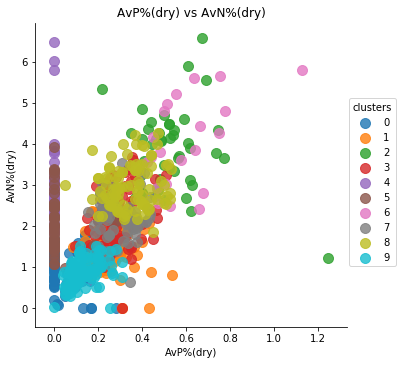

In [11]:
sns.lmplot('AvP%(dry)', 'AvN%(dry)', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('AvP%(dry) vs AvN%(dry)')
plt.xlabel('AvP%(dry)')
plt.ylabel('AvN%(dry)')

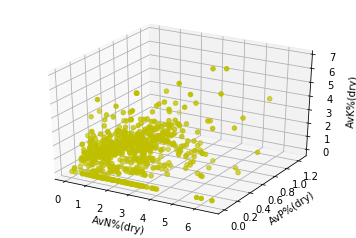

In [13]:
import importlib
importlib.import_module('mpl_toolkits.mplot3d').__path__
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_tr['AvN%(dry)'],df_tr['AvP%(dry)'],df_tr['AvK%(dry)'],c='y',marker='o');
ax.set_xlabel('AvN%(dry)')
ax.set_ylabel('AvP%(dry)')
ax.set_zlabel('AvK%(dry)')
plt.show()